In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

data1 = pd.read_csv('./output/juliap_job.txt', header=None, names=['n', 'p', 'time'])
data2 = pd.read_csv('./output/juliap2_job.txt', header=None, names=['schedule', 'n', 'p', 'time'])
data3 = pd.read_csv('./output/filter_strong_job_16.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)
data4 = pd.read_csv('./output/filter_weak_job_16.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)
data5 = pd.read_csv('./output/filter_strong_job_32.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)
data6 = pd.read_csv('./output/filter_weak_job_32.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)
data7 = pd.read_csv('./output/filter_strong_job_64.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)
data8 = pd.read_csv('./output/filter_weak_job_64.txt', header=None, names=['n', 'p', 'r', 'time'], quoting=csv.QUOTE_ALL)

data1.to_csv('./output/juliap_job.csv', index=False)
data2.to_csv('./output/juliap2_job.csv', index=False)
data3.to_csv('./output/filter_strong_job_16.csv', index=False)
data4.to_csv('./output/filter_weak_job_16.csv', index=False)
data5.to_csv('./output/filter_strong_job_32.csv', index=False)
data6.to_csv('./output/filter_weak_job_32.csv', index=False)
data7.to_csv('./output/filter_strong_job_64.csv', index=False)
data8.to_csv('./output/filter_weak_job_64.csv', index=False)

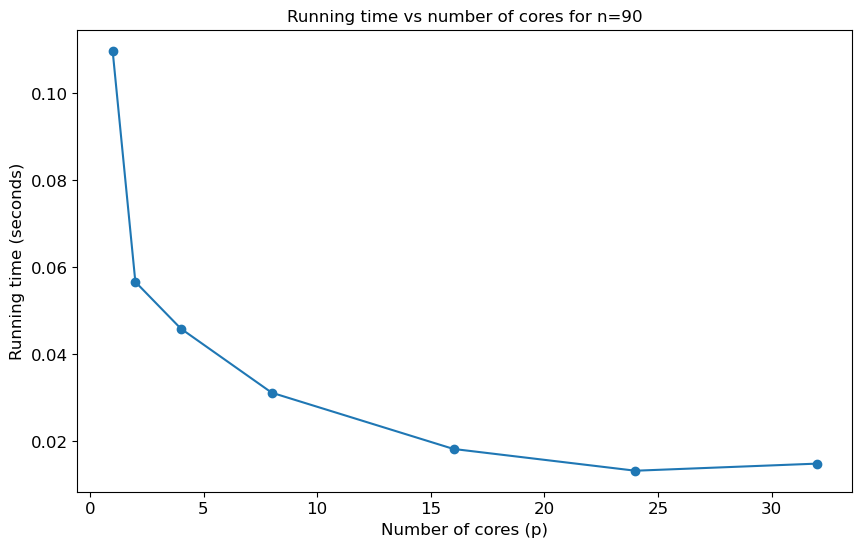

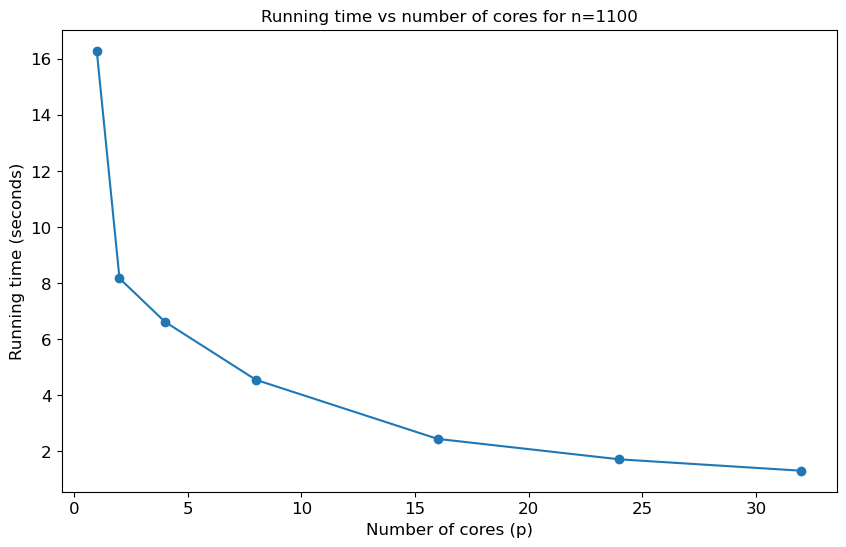

In [2]:
def plot_running_time(data, n, filename):
    filtered_data = data[data['n'] == n]
    grouped_data = filtered_data.groupby('p')['time'].min().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['p'], grouped_data['time'], marker='o')
    plt.xlabel('Number of cores (p)',fontsize=12)
    plt.ylabel('Running time (seconds)',fontsize=12)
    plt.title(f'Running time vs number of cores for n={n}',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(filename)
    plt.show()

plot_running_time(data1, 90, "./output/juliap_job_90")
plot_running_time(data1, 1100, "./output/juliap_job_1100")


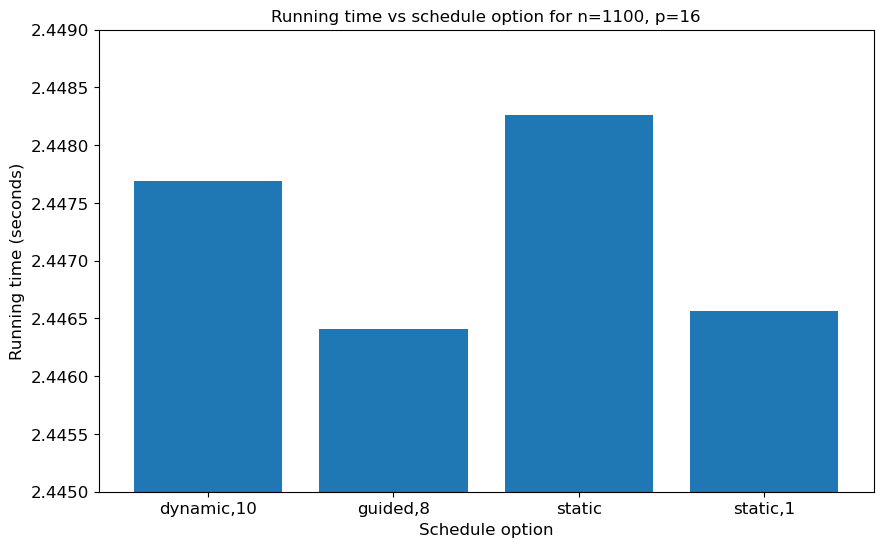

In [3]:
def plot_bar_schedule_time(data, n, p, filename):
    filtered_data = data[(data['n'] == n) & (data['p'] == p)]
    grouped_data = filtered_data.groupby('schedule')['time'].min().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data['schedule'], grouped_data['time'])
    plt.xlabel('Schedule option',fontsize=12)
    plt.ylabel('Running time (seconds)',fontsize=12)
    plt.title(f'Running time vs schedule option for n={n}, p={p}',fontsize=12)
    plt.ylim(2.445, 2.449)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(filename)
    plt.show()


plot_bar_schedule_time(data2, 1100, 16, "./output/juliap2_job")


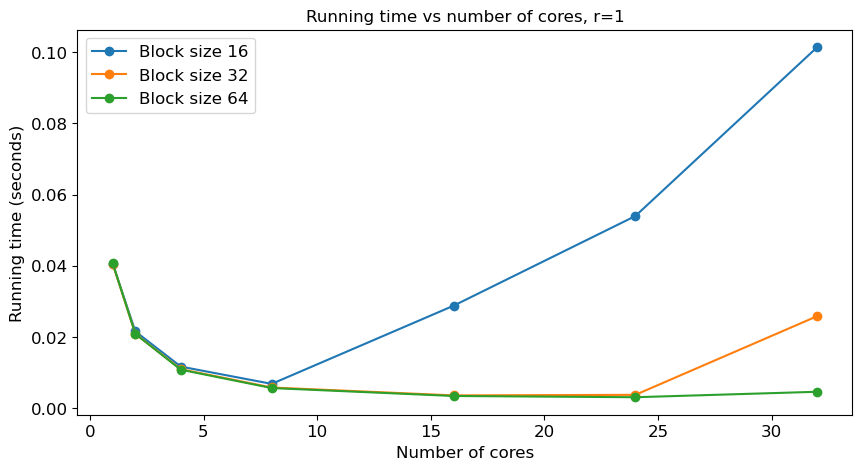

In [12]:
strong_scaling_min_time_16 = data3.groupby('p')['time'].min().reset_index()
strong_scaling_min_time_32 = data5.groupby('p')['time'].min().reset_index()
strong_scaling_min_time_64 = data7.groupby('p')['time'].min().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(strong_scaling_min_time_16['p'], strong_scaling_min_time_16['time'], marker='o', linestyle='-', label='Block size 16')
plt.plot(strong_scaling_min_time_32['p'], strong_scaling_min_time_32['time'], marker='o', linestyle='-', label='Block size 32')
plt.plot(strong_scaling_min_time_64['p'], strong_scaling_min_time_64['time'], marker='o', linestyle='-', label='Block size 64')

plt.xlabel('Number of cores', fontsize=12)
plt.ylabel('Running time (seconds)', fontsize=12)
plt.title('Running time vs number of cores, r=1', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('./output/strong_scaling_plot.png')
plt.show()

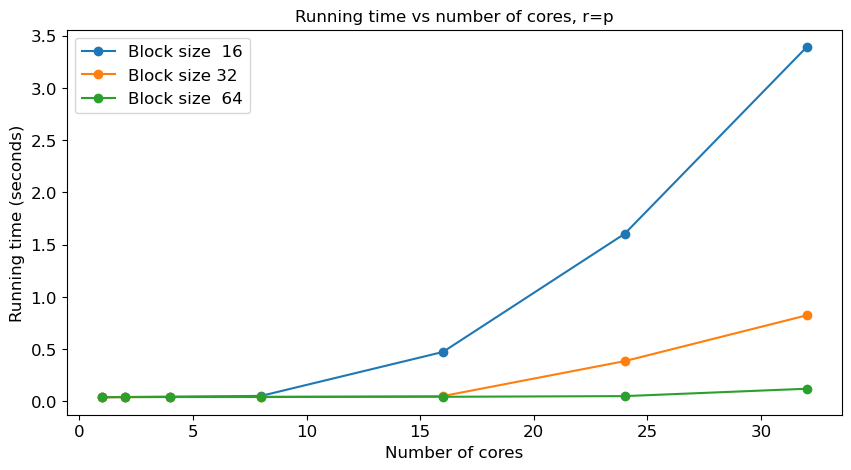

In [14]:
weak_scaling_min_time_16 = data4.groupby('p')['time'].min().reset_index()
weak_scaling_min_time_32 = data6.groupby('p')['time'].min().reset_index()
weak_scaling_min_time_64 = data8.groupby('p')['time'].min().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(weak_scaling_min_time_16['p'], weak_scaling_min_time_16['time'], marker='o', linestyle='-', label='Block size  16')
plt.plot(weak_scaling_min_time_32['p'], weak_scaling_min_time_32['time'], marker='o', linestyle='-', label='Block size 32')
plt.plot(weak_scaling_min_time_64['p'], weak_scaling_min_time_64['time'], marker='o', linestyle='-', label='Block size  64')

plt.xlabel('Number of cores', fontsize=12)
plt.ylabel('Running time (seconds)', fontsize=12)
plt.title('Running time vs number of cores, r=p', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('./output/weak_scaling_plot.png')
plt.show()
